In [109]:
import numpy as np
from matplotlib import pyplot as plt

# Requirement 1

In [110]:
def uniform_quantizer(in_val, n_bits, xmax, m):
    L = 2 ** n_bits
    delta = 2 * xmax / L
    if m == 1:      # midtread quantizer
        q_ind = np.int_(np.round(in_val / delta))
        q_ind[np.where(q_ind == -(2 ** (n_bits -1)))] = -(2 ** (n_bits -1)) + 1
    else:
        q_ind = np.int_(np.floor(in_val / delta))
        q_ind[np.where(q_ind == (2 ** (n_bits -1)))] = (2 ** (n_bits -1)) - 1
    return q_ind

# Requirement 2

In [111]:
def uniform_dequantizer(q_ind, n_bits, xmax, m):
    L = 2 ** n_bits
    delta = 2 * xmax / L
    if m == 1:
        deq_val = delta * q_ind
    else:
        deq_val = delta * q_ind + delta / 2
    return deq_val

# Requirment 3

In [112]:
def plot_signals(title, centered_origin, input_signal, output_signal):
    plt.title(title)
    if centered_origin:
        ax = plt.gca()
        ax.spines['top'].set_color('none')
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_color('none')
        ax.spines['bottom'].set_position('zero')
    plt.plot(input_signal, input_signal)
    plt.plot(input_signal, output_signal)
    plt.legend(['Input', 'Output'])
    plt.grid()
    fig = plt.gcf()
    fig.set_size_inches(14, 8)
    plt.show()

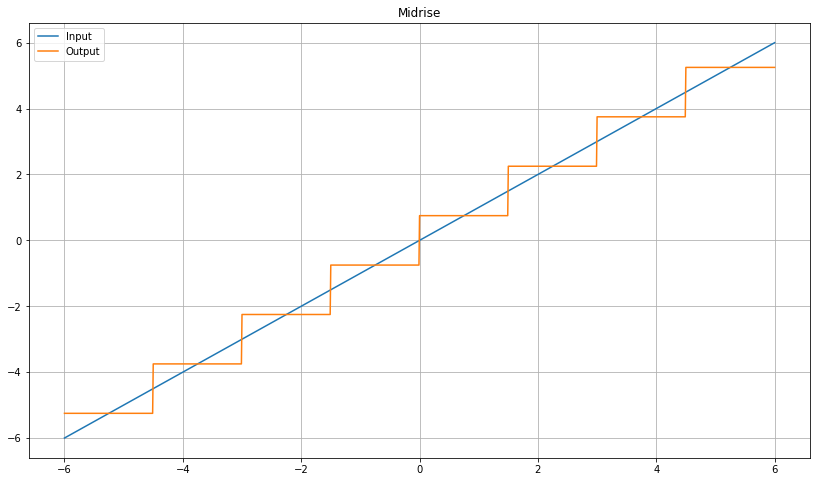

In [113]:
x = np.linspace(-6, 6, 1201)
y_midrise = uniform_dequantizer(uniform_quantizer(x, 3, 6, 0), 3, 6, 0)
plot_signals("Midrise", False, x, y_midrise)

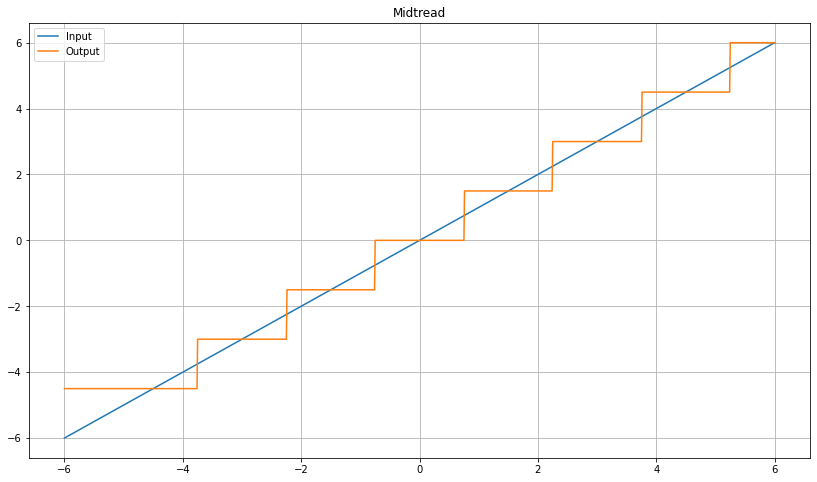

In [114]:
y_midtread = uniform_dequantizer(uniform_quantizer(x, 3, 6, 1), 3, 6, 1)
plot_signals("Midtread", False, x, y_midtread)

# Requirement 4

In [115]:
a = -5
b = 5
x = (b - a) * np.random.random_sample(10000,) + a
n_bits = np.arange(7) + 2

In [116]:
quantization_error = np.empty((7, 10000))
xmax = 5

for i in range(0, 7):
    quantization_error[i] = x - uniform_dequantizer(uniform_quantizer(x, n_bits[i], xmax, 0), n_bits[i], xmax, 0)

signal_power = np.mean(np.square(x))
quantization_error_power = np.asarray([np.mean(np.square(q)) for q in quantization_error])

snr_sim = np.asarray([signal_power / q_power for q_power in quantization_error_power])
snr_sim_db = 10 * np.log10(snr_sim)

snr_theoritical = np.asarray([signal_power * 3 * (2 ** (2 * n_bits[i])) / (xmax ** 2) for i in range(0, 7)])
snr_theoritical_db = 10 * np.log10(snr_theoritical)

practical_snr = [12.10442446 18.14810502 24.12789481 30.18802744 36.1442123  42.12941858
 48.20043643]
theoritical_snr = [12.0865772  18.10717711 24.12777702 30.14837694 36.16897685 42.18957676
 48.21017668]


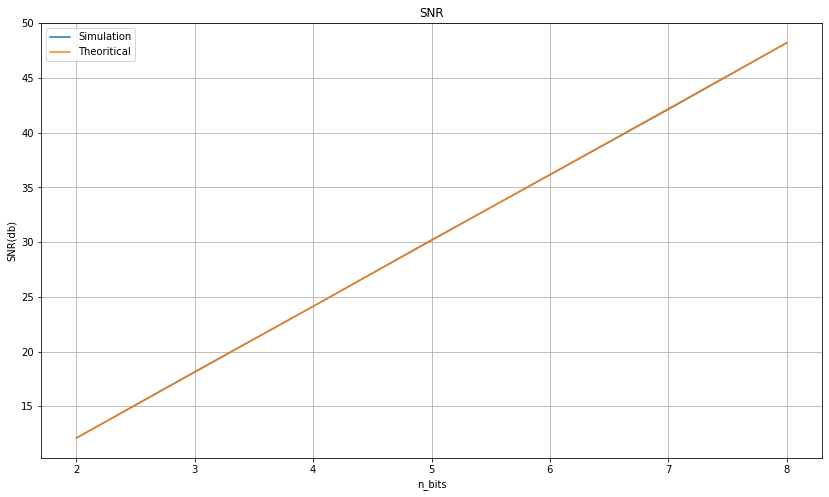

In [117]:
print(f"practical_snr = {snr_sim_db}")
print(f"theoritical_snr = {snr_theoritical_db}")
plt.title("SNR")
plt.plot(n_bits, snr_sim_db)
plt.plot(n_bits, snr_theoritical_db)
plt.legend(['Simulation', 'Theoritical'])
plt.grid()
plt.xlabel("n_bits")
plt.ylabel("SNR(db)")
fig = plt.gcf()
fig.set_size_inches(14, 8)
plt.show()

# Requirement 5

In [118]:
signal_sign = np.random.choice([1, -1], (10000,), p = [0.5, 0.5])
x = np.random.exponential(1.0, (10000,))
x = x / np.max(np.abs(x))
x = x * signal_sign
xmax = 1

In [119]:
quantization_error = np.empty((7, 10000))

for i in range(0, 7):
    quantization_error[i] = x - uniform_dequantizer(uniform_quantizer(x, n_bits[i], xmax, 0), n_bits[i], xmax, 0)

signal_power = np.mean(np.square(x))
quantization_error_power = np.asarray([np.mean(np.square(q)) for q in quantization_error])

snr_sim = np.asarray([signal_power / q_power for q_power in quantization_error_power])
snr_sim_db = 10 * np.log10(snr_sim)

snr_theoritical = np.asarray([signal_power * 3 * np.power(2, 2 * n) / np.square(xmax) for n in n_bits])
snr_theoritical_db = 10 * np.log10(snr_theoritical)

practical = [2.74422880e-03 6.98791569e+00 1.34366620e+01 1.94687673e+01
 2.55343333e+01 3.15832145e+01 3.76298133e+01]
theoritical = [ 1.5050878   7.52568771 13.54628763 19.56688754 25.58748745 31.60808737
 37.62868728]


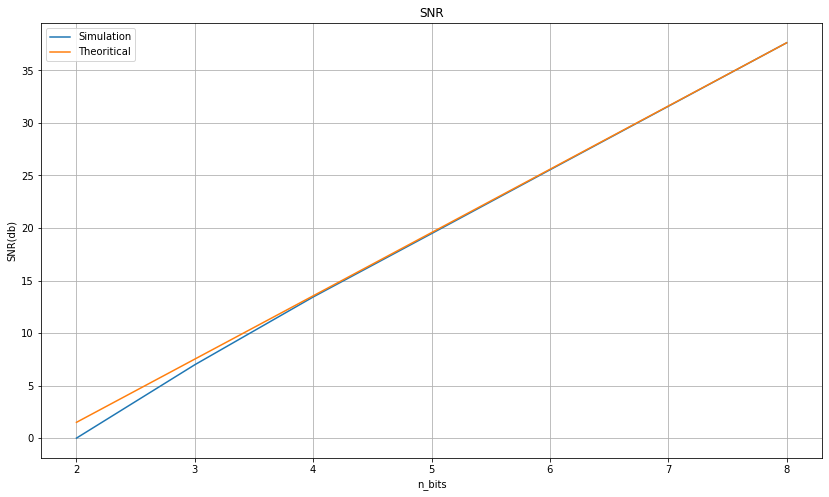

In [120]:
print(f"practical = {snr_sim_db}")
print(f"theoritical = {snr_theoritical_db}")
plt.title("SNR")
plt.plot(n_bits, snr_sim_db)
plt.plot(n_bits, snr_theoritical_db)
plt.legend(['Simulation', 'Theoritical'])
plt.grid()
plt.xlabel("n_bits")
plt.ylabel("SNR(db)")
fig = plt.gcf()
fig.set_size_inches(14, 8)
plt.show()

# Requirement 6

In [121]:
x_normalized = np.abs(x) / xmax
x_sign = np.sign(x)
x_sign[np.where(x_sign == 0)] = 1

u = np.array([5, 100, 200])
y = np.asarray([x_sign * np.log(1.0 + m * x_normalized) / np.log(1.0 + m) for m in u])
y = np.insert(y, 0, x, 0)

In [122]:
snr_db = np.empty((4, 2), dtype = np.ndarray)

for i in range(0, 4):
    
    for j in range(0, 7):
        y_q = uniform_dequantizer(uniform_quantizer(y[i], n_bits[j], xmax, 0), n_bits[j], xmax, 0)
        y_q_sign = np.sign(y_q)
        y_q_sign[np.where(y_q_sign == 0)] = 1

        if i == 0:
            x_q = y_q
        else:
            x_q = xmax * y_q_sign * (np.power(1 + u[i - 1], np.abs(y_q)) - 1) / u[i - 1]

            
        quantization_error[j] = x - x_q

    signal_power = np.mean(np.square(x))
    quantization_error_power = np.asarray([np.mean(np.square(q)) for q in quantization_error])

    snr_sim = np.asarray([signal_power / q_power for q_power in quantization_error_power])
    snr_db[i][0] = 10 * np.log10(snr_sim)

    if i == 0:
        snr_theoritical = np.asarray([signal_power * 3 * np.power(2, 2 * n) / np.square(xmax) for n in n_bits])
    else:
        snr_theoritical = np.asarray([3 * np.power(2, 2 * n) / np.square(np.log(1 + u[i - 1])) for n in n_bits])
    snr_db[i][1] = 10 * np.log10(snr_theoritical)

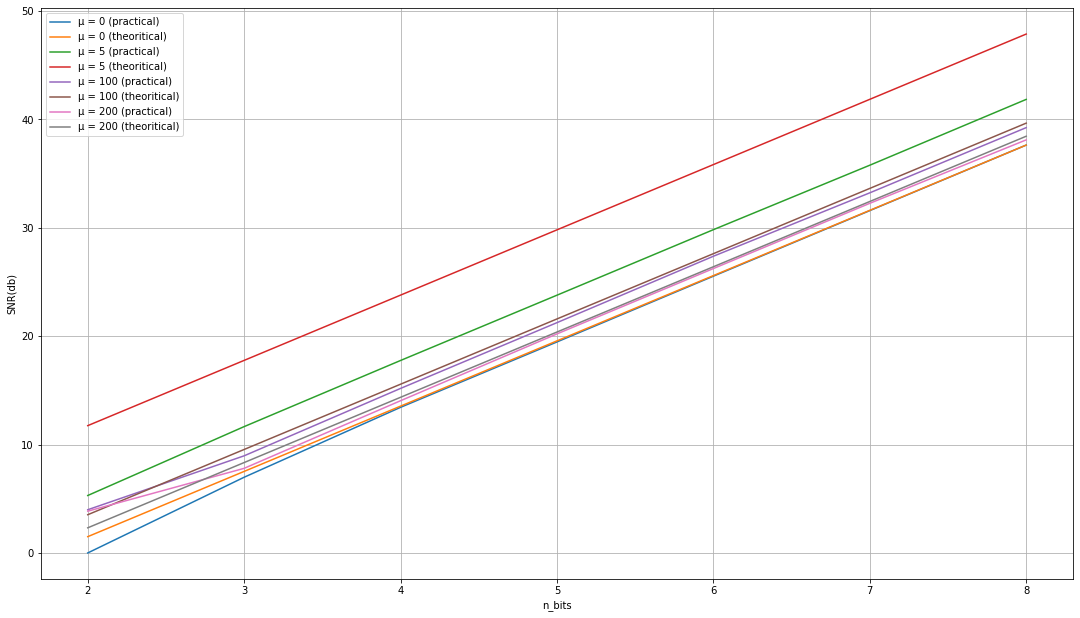

In [125]:

plt.plot(n_bits, snr_db[0][0])
plt.plot(n_bits, snr_db[0][1])
plt.plot(n_bits, snr_db[1][0])
plt.plot(n_bits, snr_db[1][1])
plt.plot(n_bits, snr_db[2][0])
plt.plot(n_bits, snr_db[2][1])
plt.plot(n_bits, snr_db[3][0])
plt.plot(n_bits, snr_db[3][1])

        
plt.legend(["µ = 0 (practical)", "µ = 0 (theoritical)", "µ = 5 (practical)", "µ = 5 (theoritical)", 
            "µ = 100 (practical)", "µ = 100 (theoritical)", "µ = 200 (practical)", "µ = 200 (theoritical)"], )

plt.grid()
plt.ylabel("SNR(db)")
plt.xlabel("n_bits")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()